In [14]:
#import package
from cobra import Model, Reaction, Metabolite
import cobra
import pandas as pd
import numpy as np
from pandas import ExcelWriter
from pandas import ExcelFile

from cobra.flux_analysis import (
    single_gene_deletion, single_reaction_deletion, double_gene_deletion,
    double_reaction_deletion)
from cobra.util.solver import linear_reaction_coefficients
import numpy as np
import warnings
warnings.simplefilter("ignore", UserWarning)
from sklearn import datasets


In [15]:
from sklearn.datasets import load_iris
>>> from sklearn import tree
>>> iris = load_iris()
>>> clf = tree.DecisionTreeClassifier()
>>> clf = clf.fit(iris.data, iris.target)

In [16]:
print iris.target

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [17]:
MET_Species=pd.read_csv('SPECIES.csv',header=None)
MET_Iso_source=pd.read_csv('ISOLATION_SOURCE.csv',header=None)
MET_Gen_loc=pd.read_csv('GENERAL_LOCATION.csv',header=None)
matrix=pd.read_csv('MATRIX_New.csv',header=0)

In [18]:
MET_Type=pd.read_csv('TYPE.csv',header=0)
MET_Type
MET_Type=MET_Type.set_index("Strain")
MET_Type

,Type
Strain,
1303.134,Endocarditis
1303.136,Endocarditis
1303.137,Commensal
1303.430,Commensal
1303.440,Commensal
1303.700,Commensal
1303.710,Commensal
1303.730,Commensal
1303.740,Commensal


In [19]:
c0=0
c1=0
for item in MET_Type['Type']:
    if item == 'Endocarditis':
        c0+=1
    if item == 'Commensal':
        c1+=1
    print item
print c0,c1
print c0+c1

Endocarditis
Endocarditis
Commensal
Commensal
Commensal
Commensal
Commensal
Commensal
Commensal
Commensal
Commensal
Commensal
Commensal
Commensal
Commensal
Commensal
Commensal
Commensal
Commensal
Commensal
Endocarditis
Commensal
Commensal
Commensal
Commensal
Commensal
Commensal
Commensal
Commensal
Commensal
Endocarditis
Endocarditis
Endocarditis
Endocarditis
Endocarditis
Endocarditis
Endocarditis
Endocarditis
Endocarditis
Endocarditis
Endocarditis
Commensal
Commensal
Commensal
Commensal
Commensal
Commensal
Commensal
Commensal
Commensal
Commensal
Commensal
Endocarditis
Endocarditis
Endocarditis
Endocarditis
Endocarditis
Endocarditis
Endocarditis
Endocarditis
Endocarditis
Endocarditis
Endocarditis
Endocarditis
Endocarditis
Endocarditis
Endocarditis
Endocarditis
Endocarditis
Endocarditis
Endocarditis
Endocarditis
34 38
72


In [20]:
MET_Type=MET_Type.replace('Endocarditis',0)
MET_Type=MET_Type.replace('Commensal',1)

In [7]:
c0=0
c1=0
for item in MET_Type['Type']:
    if item == 0:
        c0+=1
    if item == 1:
        c1+=1
    print item
print c0,c1
print c0+c1

0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
0
0
-
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
34 38
72


In [ ]:
MET_Species
MET_Species.columns=["Strain","Species"]


In [ ]:

MET_Species=MET_Species.set_index("Strain")
MET_Species

In [ ]:
MET_Iso_source

In [ ]:
MET_Iso_source.columns=["Strain","Isolation Source"]
MET_Iso_source

In [ ]:

MET_Iso_source=MET_Iso_source.set_index("Strain")
MET_Iso_source

In [ ]:
MET_Gen_loc
MET_Gen_loc.columns=["Strain","General Location"]


In [ ]:
MET_Gen_loc=MET_Gen_loc.set_index("Strain")
MET_Gen_loc

In [21]:
matrix=matrix.set_index(['Strain'])


In [22]:
matrix

,psaA,nanA,cba,pavA,pavB/pfbB,slrA,zmpB,htrA/degP,piuA,cps2E,...,SPH_0460,pblA,clpE,STER_1222,SPH_0461,psrP,abpB,inlK,cps4K,pfbA
Strain,,,,,,,,,,,,,,,,,,,,,
1303.134,1,1,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1303.136,1,0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1303.137,1,1,0,1,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1303.430,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1303.440,1,0,0,1,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1303.700,1,0,0,1,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1303.710,1,1,0,1,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1303.730,1,1,0,1,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1303.740,1,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:

MET_Gen_loc

In [10]:
Species=MET_Species["Species"]
Iso_loc=MET_Iso_source["Isolation Source"]
Gen_loc=MET_Gen_loc["General Location"]
LISTOFLISTS=[Species, Iso_loc, Gen_loc]


KeyError: 'Species'

In [ ]:
for List in LISTOFLISTS:
    print (List.name, List.unique())

In [ ]:
c0=0
c1=0
c2=0
c3=0
for item in MET_Species["Species"]:
    if item == 'Streptococcus oralis':
        c0+=1
    if item == 'Streptococcus tigurinus ':
        c1+=1
    if item == 'Streptococcus sp.':
        c2+=1
    if item == 'Oralis subsp. dentisani':
        c3+=1
    print item
print c0,c1,c2,c3
print c0+c1+c2+c3

In [ ]:
MET_Species=MET_Species.replace('Streptococcus oralis',0)
MET_Species=MET_Species.replace('Streptococcus tigurinus ',1)
MET_Species=MET_Species.replace('Streptococcus sp.',2)
MET_Species=MET_Species.replace('Oralis subsp. dentisani',3)



In [ ]:
MET_Species
c0=0
c1=0
c2=0
c3=0
for item in MET_Species["Species"]:
    if item == 0:
        c0+=1
    if item == 1:
        c1+=1
    if item == 2:
        c2+=1
    if item == 3:
        c3+=1
    print item
print c0,c1,c2,c3
print c0+c1+c2+c3

In [ ]:
MET_Iso_source
drop_list_iso=[]
for strains in MET_Iso_source.index:
    if MET_Iso_source.loc[strains] ['Isolation Source']=='blank':
        print strains
        drop_list_iso.append(strains)

In [ ]:
for strains in drop_list_iso:
    #MET_Iso_source=MET_Iso_source.drop(strains, axis=0)
    print 'MET_Iso_source=MET_Iso_source.drop(%s, axis=0)'% (strains)
    

In [ ]:
MET_Iso_source=MET_Iso_source.drop(1303.134, axis=0)
MET_Iso_source=MET_Iso_source.drop(1303.7, axis=0)
MET_Iso_source=MET_Iso_source.drop(1303.71, axis=0)
MET_Iso_source=MET_Iso_source.drop(1303.73, axis=0)
MET_Iso_source=MET_Iso_source.drop(1303.75, axis=0)
MET_Iso_source=MET_Iso_source.drop(1303.88, axis=0)
MET_Iso_source=MET_Iso_source.drop(655813.4, axis=0)
MET_Iso_source=MET_Iso_source.drop(927666.3, axis=0)
MET_Iso_source=MET_Iso_source.drop(1005704.3, axis=0)
MET_Iso_source=MET_Iso_source.drop(1095738.3, axis=0)
MET_Iso_source=MET_Iso_source.drop(1095739.3, axis=0)
MET_Iso_source=MET_Iso_source.drop(1095740.3, axis=0)
MET_Iso_source=MET_Iso_source.drop(1095741.3, axis=0)
MET_Iso_source=MET_Iso_source.drop(1161421.3, axis=0)

In [ ]:
matrix_iso=matrix.drop(1303.134, axis=0)
matrix_iso=matrix_iso.drop(1303.7, axis=0)
matrix_iso=matrix_iso.drop(1303.71, axis=0)
matrix_iso=matrix_iso.drop(1303.73, axis=0)
matrix_iso=matrix_iso.drop(1303.75, axis=0)
matrix_iso=matrix_iso.drop(1303.88, axis=0)
matrix_iso=matrix_iso.drop(655813.4, axis=0)
matrix_iso=matrix_iso.drop(927666.3, axis=0)
matrix_iso=matrix_iso.drop(1005704.3, axis=0)
matrix_iso=matrix_iso.drop(1095738.3, axis=0)
matrix_iso=matrix_iso.drop(1095739.3, axis=0)
matrix_iso=matrix_iso.drop(1095740.3, axis=0)
matrix_iso=matrix_iso.drop(1095741.3, axis=0)
matrix_iso=matrix_iso.drop(1161421.3, axis=0)

In [ ]:
len(matrix_iso)

In [ ]:
c0=0
c1=0
c2=0
c3=0
c4=0
c5=0
c6=0
c7=0
for item in MET_Iso_source["Isolation Source"]:
    if item == 'blood':
        c0+=1
    if item == 'oral cavity':
        c1+=1
    if item == 'tooth surface':
        c2+=1
    if item == 'throat':
        c3+=1
    if item == 'fruit residues (memencylon)':
        c4+=1
    if item == 'nasopharynx':
        c5+=1
    if item == 'joint aspirate':
        c6+=1
    if item == 'prosthetic joint infection':
        c7+=1
print item
print c0,c1,c2,c3,c4,c5,c6,c7
print c0+c1+c2+c3+c4+c5+c6+c7

In [ ]:
MET_Iso_source=MET_Iso_source.replace('blood',0)
MET_Iso_source=MET_Iso_source.replace('oral cavity',1)
MET_Iso_source=MET_Iso_source.replace('tooth surface',2)
MET_Iso_source=MET_Iso_source.replace('throat',3)
MET_Iso_source=MET_Iso_source.replace('fruit residues (memencylon)',4)
MET_Iso_source=MET_Iso_source.replace('nasopharynx',5)
MET_Iso_source=MET_Iso_source.replace('joint aspirate',6)
MET_Iso_source=MET_Iso_source.replace('prosthetic joint infection',7)


In [ ]:
c0=0
c1=0
c2=0
c3=0
c4=0
c5=0
c6=0
c7=0
for item in MET_Iso_source["Isolation Source"]:
    if item == 0:
        c0+=1
    if item == 1:
        c1+=1
    if item == 2:
        c2+=1
    if item == 3:
        c3+=1
    if item == 4:
        c4+=1
    if item == 5:
        c5+=1
    if item == 6:
        c6+=1
    if item == 7:
        c7+=1
print c0,c1,c2,c3,c4,c5,c6,c7
print c0+c1+c2+c3+c4+c5+c6+c7

In [ ]:
MET_Gen_loc
drop_list_genloc=[]
for strains in MET_Gen_loc.index:
    if MET_Gen_loc.loc[strains] ['General Location']=='blank':
        print strains
        drop_list_genloc.append(strains)

In [ ]:
for strains in drop_list_genloc:
    MET_Gen_loc=MET_Gen_loc.drop(strains, axis=0)
    print 'matrix_genloc=matrix_genloc.drop(%s, axis=0)'% (strains)

In [ ]:
matrix_genloc=matrix.drop(655813.3, axis=0)
matrix_genloc=matrix_genloc.drop(655813.4, axis=0)
matrix_genloc=matrix_genloc.drop(888049.3, axis=0)
matrix_genloc=matrix_genloc.drop(927666.3, axis=0)
matrix_genloc=matrix_genloc.drop(1005704.3, axis=0)
matrix_genloc=matrix_genloc.drop(1077464.24, axis=0)
matrix_genloc=matrix_genloc.drop(1095738.3, axis=0)
matrix_genloc=matrix_genloc.drop(1095739.3, axis=0)
matrix_genloc=matrix_genloc.drop(1095740.3, axis=0)
matrix_genloc=matrix_genloc.drop(1095741.3, axis=0)
matrix_genloc=matrix_genloc.drop(1161421.3, axis=0)
matrix_genloc=matrix_genloc.drop(1297857.3, axis=0)


In [ ]:
len(MET_Gen_loc)

In [ ]:
len(matrix_genloc)

In [ ]:
MET_Gen_loc.columns

In [ ]:


c0=0
c1=0
c2=0
c3=0
c4=0
c5=0
c6=0
c7=0
c8=0
for item in MET_Gen_loc['General Location']:
    if item == 'Canada':
        c0+=1
    if item == 'Spain':
        c1+=1
    if item == 'Sweden':
        c2+=1
    if item == 'Denmark':
        c3+=1
    if item == 'USA':
        c4+=1
    if item == 'Germany':
        c5+=1
    if item == "Cote d'Ivoire":
        c6+=1
    if item == 'South Africa':
        c7+=1
    if item == 'Switzerland':
        c8+=1
print item
print c0,c1,c2,c3,c4,c5,c6,c7,c8
print c0+c1+c2+c3+c4+c5+c6+c7+c8

In [ ]:
MET_Gen_loc=MET_Gen_loc.replace('Canada',0)
MET_Gen_loc=MET_Gen_loc.replace('Spain',1)
MET_Gen_loc=MET_Gen_loc.replace('Sweden',2)
MET_Gen_loc=MET_Gen_loc.replace('Denmark',3)
MET_Gen_loc=MET_Gen_loc.replace('USA',4)
MET_Gen_loc=MET_Gen_loc.replace('Germany',5)
MET_Gen_loc=MET_Gen_loc.replace("Cote d'Ivoire",6)
MET_Gen_loc=MET_Gen_loc.replace('South Africa',7)
MET_Gen_loc=MET_Gen_loc.replace('Switzerland',8)


In [ ]:
c0=0
c1=0
c2=0
c3=0
c4=0
c5=0
c6=0
c7=0
c8=0
for item in MET_Gen_loc['General Location']:
    if item == 0:
        c0+=1
    if item == 1:
        c1+=1
    if item == 2:
        c2+=1
    if item == 3:
        c3+=1
    if item == 4:
        c4+=1
    if item == 5:
        c5+=1
    if item == 6:
        c6+=1
    if item == 7:
        c7+=1
    if item == 8:
        c8+=1
print c0,c1,c2,c3,c4,c5,c6,c7,c8
print c0+c1+c2+c3+c4+c5+c6+c7+c8

In [ ]:
MET_Species.shape

In [24]:
data_features=[genes for genes in matrix.columns]
print data_features

['psaA', 'nanA', 'cba', 'pavA', 'pavB/pfbB', 'slrA', 'zmpB', 'htrA/degP', 'piuA', 'cps2E', 'lmb', 'sspA', 'wzg', 'SPH_0459', 'wchA', 'wchJ', 'pas', 'hasC', 'cbpD', 'hysA', 'pitA', 'sipA', 'pitB', 'srtG1', 'srtG2', 'spaP', 'rmlD', 'rmlB', 'hasC1', 'rmlA', 'cps2T', 'cps2L', 'epsE', 'wzh', 'lytA', 'pblB', 'ABBFA_003460', 'cppA', 'SPH_0455', 'padA', 'M3Q_286', 'cshA', 'cps2P', 'groEL', 'gbs1356', 'rmlC', 'SSU05_0570', 'wzd', 'cbpG', 'ssaB', 'rfbA-1', 'hasB', 'STER_1223', 'cpbA', 'gtfD', 'iga', 'cshB', 'ABZJ_00075', 'lap', 'ssp-5', 'cps4A', 'wze', 'abpA', 'lytB', 'cps4B', 'cps4C', 'srpA', 'cps2F', 'ACICU_00072', 'ACI49667', 'gspB', 'cps4F', 'cps4J', 'cbpA', 'SPH_0460', 'pblA', 'clpE', 'STER_1222', 'SPH_0461', 'psrP', 'abpB', 'inlK', 'cps4K', 'pfbA']


In [23]:
import graphviz 
from sklearn.datasets import load_iris
from sklearn import tree

In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(matrix, MET_Species)

In [ ]:
clf= tree.export_graphviz(clf, out_file=None,
                         feature_names=data_features,  
                         class_names=['Streptococcus oralis', 'Streptococcus tigurinus ',
       'Streptococcus sp.', 'Oralis subsp. dentisani'],  
                         filled=True, rounded=True,  
                         special_characters=True) 
graph = graphviz.Source(clf)  
graph.render("Species Tree (Mar. 13)")

graph

In [ ]:
MET_Iso_source.shape


In [ ]:
clf2 = tree.DecisionTreeClassifier(max_depth=3)
clf2 = clf2.fit(matrix_iso, MET_Iso_source)
clf2= tree.export_graphviz(clf2, out_file=None,
                         feature_names=data_features,  
                         class_names=[ 'blood', 'oral cavity', 'tooth surface', 'throat',
       'fruit residues (memencylon)', 'nasopharynx', 'joint aspirate',
       'prosthetic joint infection'],  
                         filled=True, rounded=True,  
                         special_characters=True) 
graph2 = graphviz.Source(clf2)  
graph2.render("Isolation Source Tree Max_depth 3 (Mar. 13)")

graph2

In [ ]:
clf3 = tree.DecisionTreeClassifier(max_depth=3)
clf3 = clf3.fit(matrix_genloc, MET_Gen_loc)
clf3= tree.export_graphviz(clf3, out_file=None,
                         feature_names=data_features,  
                         class_names=['Canada', 'Spain', 'Sweden', 'Denmark', 'USA', 'Germany',
       "Cote d'Ivoire", 'South Africa', 'Switzerland'],  
                         filled=True, rounded=True,  
                         special_characters=True) 
graph3 = graphviz.Source(clf3)  
graph3.render("General Location Tree Max_depth 3 (Mar. 13)")

graph3

In [11]:
strains_in_matrix=[strain for strain in MET_Type.index]

In [12]:
for strains in matrix.index: 
    if strains not in strains_in_matrix: 
        print strains

In [13]:
print len(matrix)
print len(MET_Type)

72
73


In [30]:
clf4 = tree.DecisionTreeClassifier(max_depth=3)
clf4 = clf4.fit(matrix, MET_Type)

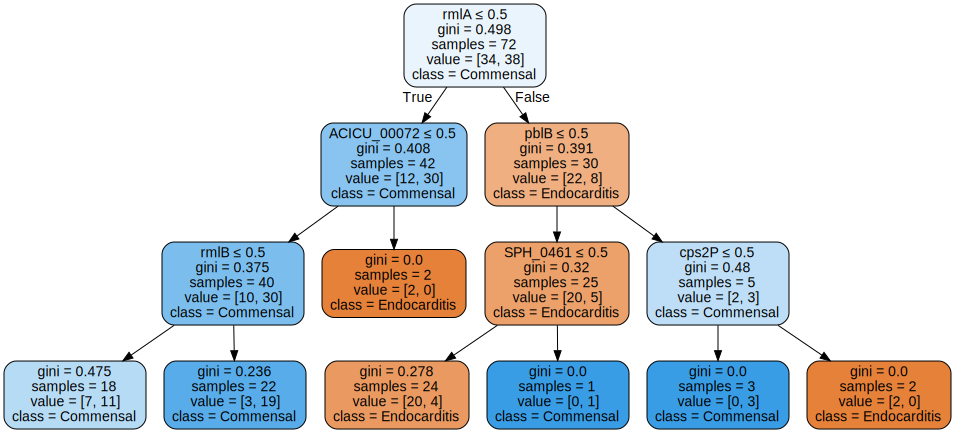

In [31]:
clf4= tree.export_graphviz(clf4, out_file=None,
                         feature_names=data_features,  
                         class_names=['Endocarditis', 'Commensal'],  
                         filled=True, rounded=True,  
                         special_characters=True) 
graph2 = graphviz.Source(clf4)  
graph2.render("Disease Type Decision Tree Max_Depth 3 (Mar. 13)")

graph2

In [ ]:
#SAMPLE CODE
#MET_Species=pd.DataFrame(MET_Species, columns = ["Strain","Species"])
MET_Species.columns=["Strain","Species"]
MET_Species
MET_Species=MET_Species.set_index("Strain")
MET_Species

In [ ]:

MET_Disease=pd.read_csv('Metadata_Disease.csv')
MET_Disease=MET_Disease.set_index("Strain")
Matrix=pd.read_csv('Matrix.csv')
MET_Test_unk=pd.read_csv('1077464.24_testfile.csv', header=None)
MET_Test1=pd.read_csv('1333865.3]_testfile.csv', header=None)

MET_Test2=pd.read_csv('1303.71_testfile.csv', header=None)

MET_Species

In [ ]:
MET_Disease.index
mettest=MET_Test_unk.T
mettest1=MET_Test1.T
mettest2=MET_Test2.T
mettest.shape
MET_Species.columns

In [ ]:
genelist=[str(item) for item in Matrix.columns.values]


In [ ]:
Met_Species=MET_Species.as_matrix
Met_Disease=MET_Disease.as_matrix
Met_Disease
data_target=['Commensal', 'Endocarditis']
data_feaures=[str(item) for item in genelist]

In [ ]:
Matrix

In [ ]:
from sklearn.datasets import load_iris
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(Matrix, MET_Disease)

In [ ]:
import graphviz 
exp= tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(exp) 
graph.render("output") 

In [ ]:
clf= tree.export_graphviz(clf, out_file=None, 
                         feature_names=data_feaures,  
                         class_names=data_target,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph2 = graphviz.Source(clf)  
graph2.render("Disease Decision Tree")
graph2

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(Matrix, MET_Disease)
clf.predict([mettest])

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(Matrix, MET_Disease)
clf.predict([mettest1])

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(Matrix, MET_Disease)
clf.predict([mettest2])

In [ ]:
MET_Species

In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(Matrix, MET_Disease)
p=str(clf.predict([mettest]))
#print p
MET_Disease.columns

In [ ]:
i=1
strain=MET_Disease.index[0]
Type=MET_Disease.iloc[i]['Type']
print 'Strain: %s , Type: %s , Labeled: %s' % (strain,Type,p)

In [ ]:
#MATCHED WITH METADATA


mat=[]
c1=0
c2=0
for i in range(len(Matrix)):
    mat=Matrix.loc[i]
    strain=MET_Disease.index[i]
    Type=MET_Disease.iloc[i]['Type']
    p=str(clf.predict([mat]))
    c1+=1
    if p==str(Type):
        Q='Did not match \n'
        c2+=1
        print Q
    print 'Strain: %s, Type: %s , Labeled: %s' % (strain,Type,p)
print (c1,c2)

   

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(Matrix, MET_Species)

In [ ]:
clf= tree.export_graphviz(clf, out_file=None,
                         feature_names=data_feaures,  
                         class_names=['Streptococcus oralis','Streptococcus tigurinus','Oralis subsp. dentisani','Streptococcus oralis ','Streptococcus sp.'],  
                         filled=True, rounded=True,  
                         special_characters=True) 
graph3 = graphviz.Source(clf)  
graph3.render("Species Decsion Tree")
graph3

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(Matrix, MET_Species)

In [ ]:
#MATCHED WITH METADATA


met=[]
c1=0
c2=0
for i in range(len(Matrix)):
    met=Matrix.loc[i]
    strain=MET_Species.index[i]
    Type=MET_Species.iloc[i]['Species']
    p=str(clf.predict([met]))
    c1+=1
    if p==str(Type):
        Q='Did not match \n'
        c2+=1
        print Q
    print 'Strain: %s, Type: %s , Labeled: %s' % (strain,Type,p)
print (c1,c2)


In [ ]:
MET_Disease

In [ ]:
from sklearn.datasets import load_iris
>>> from sklearn import tree
>>> iris = load_iris()
>>> clf = tree.DecisionTreeClassifier()
>>> clf = clf.fit(iris.data, iris.target)


dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 
iris.target_names

len(iris.target)
iris.data

In [ ]:
iris.feature_names